<h1 align="center">Volume 4: River Crossing.</h1>

    Marcelo Leszynski
    Section 002
    02/21/2022

In [3]:
import numpy as np
from scipy.optimize import minimize, root
from scipy.integrate import quad
from matplotlib import pyplot as plt

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [14]:
def lagrangian(x, y=None, y_p=None):
    # calculate and return the lagrangian ##############################
    c = -0.7*(x**2 - 1)
    alpha = (1 - c**2)**(-0.5)
    lagrangian = alpha * np.sqrt(1 + (alpha*y_p(x))**2) - (alpha**2)*c*y_p(x)
    
    return lagrangian


T_functional = lambda a, b, y, y_p: quad(lagrangian, a, b, args=(y, y_p))[0]

# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [15]:
# initialize line values between A and B ###############################
y = lambda x: 2.5*x + 2.5
y_p = lambda x: 2.5

# print results ########################################################
print("Upper bound:")
print(T_functional(-1, 1, y, y_p))
print("\nLower bound:\n2")

Upper bound:
3.8770820491384126

Lower bound:
2


# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

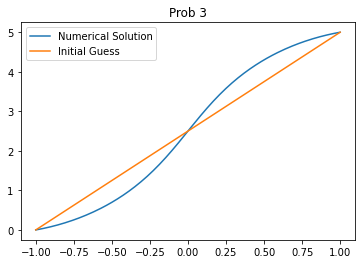

In [18]:
# using the pseudospectral method ######################################
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0, N, N + 1))
    x.shape = (N + 1, 1)
    lin = np.linspace(0, N, N + 1)
    lin.shape = (N + 1, 1)
    c = np.ones((N + 1, 1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N + 1)
    dX = X - X.T
    
    # prep and return diff matrix and Chebyshev points #################
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    
    return D, x


D, x = cheb(150)


def EL(y):
    c = -0.7*(x**2 - 1)
    alpha = (1-c**2)**(-0.5)
    
    # calculate EL and return boundary conditions ######################
    dy = D @ y
    F = D @ (alpha**3 * dy * (1 + (alpha*dy)**2)**(-0.5) - alpha**2 * c)
    F[0] = y[0] - 5
    F[-1] = y[-1]
    
    return F

# solve and plot results ###############################################
y = root(EL, 2.5*x + 2.5).x
plt.plot(x, y, label="Numerical Solution")
plt.plot(x, 2.5*x + 2.5, label="Initial Guess")
plt.legend()
plt.title("Prob 3")
plt.show()

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

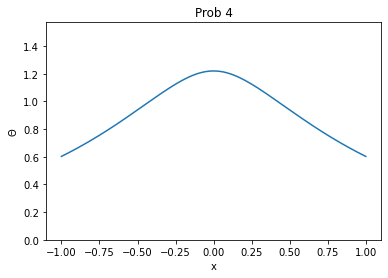

In [19]:
# get y_p and set up equation ##########################################
dy = D @ y
c = -0.7*(x**2 - 1)
eq_71 = lambda theta: c*(1/np.cos(theta)) + np.tan(theta) - dy

# solve and plot results ###############################################
theta_vals = root(eq_71, np.ones(151)).x
plt.plot(x, theta_vals)
plt.ylim(0, np.pi/2)
plt.xlabel("x")
plt.ylabel("$\Theta$")
plt.title("Prob 4")
plt.show()